# Load libraries

In [37]:
import pandas as pd
import re

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from src.visualization.visualize import plot_confusion_matrix

# Functions

In [33]:
def preprocessing(sentiments):
    corpus = []
    for sentiment in sentiments:
        sentiment = re.sub('[^a-zA-Z]', ' ', sentiment)
        sentiment = sentiment.lower()
        sentiment = sentiment.split()
        
        ps = PorterStemmer()
        all_stopwords = stopwords.words('english')
        all_stopwords.remove('not')
        
        sentiment = [ps.stem(word) for word in sentiment if not word in set(all_stopwords)]
        sentiment = ' '.join(sentiment)
        corpus.append(sentiment)
    return corpus

def bag_of_words(corpus, tweets):
    cv = CountVectorizer(max_features = 1500)
    X = cv.fit_transform(corpus).toarray()
    
    y = tweets.iloc[:, -1].values
    
    return X, y

def gaussiannb(X_train, y_train, X_test):
    gaussian_model = GaussianNB()
    gaussian_model.fit(X_train, y_train)
    y_pred = gaussian_model.predict(X_test)
    return y_pred

# Load data

In [34]:
tweets = pd.read_csv('../data/external/tweets/tweets.csv')
tweets['Sentiment'] = tweets['Sentiment'].map({'neg': 0, 'pos':1})
tweets = tweets[['SentimentText', 'Sentiment']]
tweets.head()
print(tweets.shape)

(50000, 2)


In [35]:
corpus = preprocessing(tweets['SentimentText'])
X, y = bag_of_words(corpus, tweets)
X_train, X_test, y_train, y_test = train_test_split(X, y)
y_pred = gaussiannb(X_train, y_train, X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3421 2357]
 [1735 4987]]


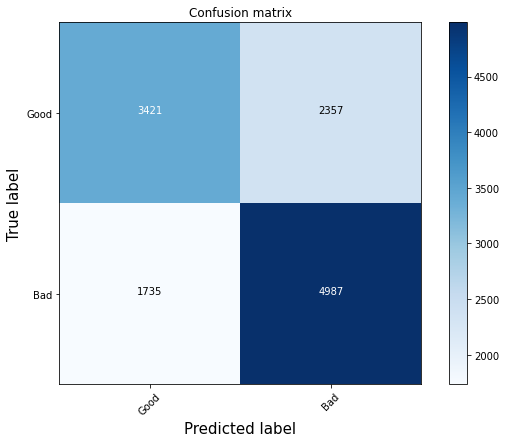

In [38]:
plot_confusion_matrix(cm, ['Good', 'Bad'])